In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load data

In [2]:
from helper import load_data, normalize_data

data = load_data()
data.shape

(272, 2)

### Initialize your cluster centers

In [192]:
def initialize_clusters(data, k):
    """initialize the k cluster centers (the means).
    input:
        data: original data with shape (num_sample, num_feature).
        k: predefined number of clusters for the k-means algorithm.
    output:
        a numpy array with shape (k, num_feature)
    """
    # ***************************************************************************************************
    # INSERT YOUR CODE HERE
    # TODO: initialize cluster centers.
    # TODO: Make sure you choose k clusters from the data itself,
    #       or ensure otherwise that your initializations have the same scaling as the data
    # ***************************************************************************************************
    indices = np.random.choice(np.arange(data.shape[0]), k, False)
    return data[indices]

### Update k-means parameters

#### Build distance matrix
Build a distance matrix, collecting the distances of the original dataset to the means of the clusters.

NOTE: once you finish your `build_distance_matrix`, please copy the function to the `helper.py` function. Otherwise, the `kmeans` function will not work.

In [159]:
def build_distance_matrix(data, mu):
    """build a distance matrix.
    return
        distance matrix:
            row of the matrix represents the data point,
            column of the matrix represents the k-th cluster.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: build distance matrix
    # ***************************************************
    d_matrix = []
    for i in range(data.shape[0]):
        d_matrix_row = []
        for j in range(mu.shape[0]):
            d_matrix_row.append(np.linalg.norm(data[i] - mu[j]))
        d_matrix.append(d_matrix_row)
    return np.array(d_matrix)

#### Update k-means parameters

In [262]:
def update_kmeans_parameters(data, mu_old):
    """update the parameter of kmeans
    return:
        losses: loss of each data point with shape (num_samples, 1)
        assignments: assignments vector z with shape (num_samples, 1)
        mu: mean vector mu with shape (k, num_features)
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: update kmeans parameters
    # ***************************************************
    N = data.shape[0]
    d_matrix = build_distance_matrix(data, mu_old)
    clusters_per_point = np.argmin(d_matrix, axis=1)
    new_distances = np.array([np.linalg.norm(data[i] - mu_old[c]) for i, c in enumerate(clusters_per_point)]).reshape(N,1)
    mu_new = np.zeros(mu_old.shape)
    for i in range(N):
        mu_new[clusters_per_point[i]] += data[i]
    _, num_point_clus = np.unique(clusters_per_point, return_counts=True)
    for i in range(mu_new.shape[0]):
        mu_new[i] /= num_point_clus[i]
    return new_distances, clusters_per_point.reshape(N,1), mu_new 

#### Play with k-means

The current iteration of k-means is: 0,                the average loss is 9.94881640722267.


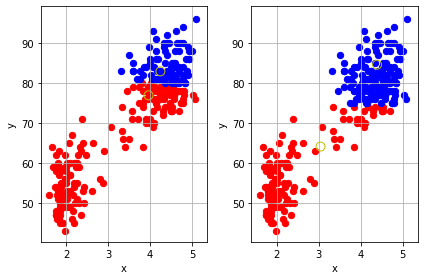

The current iteration of k-means is: 1,                the average loss is 6.797838447541784.


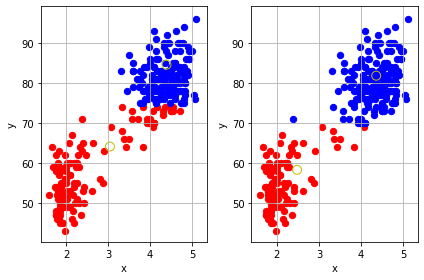

The current iteration of k-means is: 2,                the average loss is 5.087819755302896.


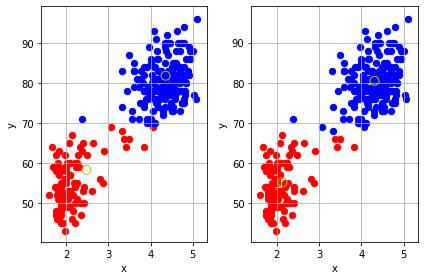

The current iteration of k-means is: 3,                the average loss is 4.70109033255045.


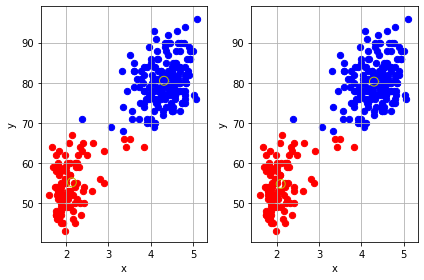

The current iteration of k-means is: 4,                the average loss is 4.68244411160236.


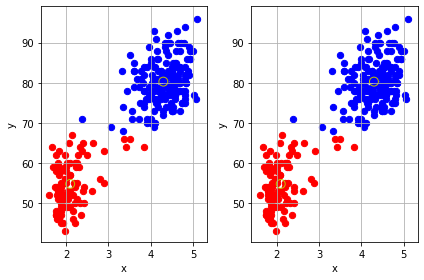

The current iteration of k-means is: 5,                the average loss is 4.68244411160236.


In [263]:
from helper import build_dir
from plots import plot

def kmeans(data, k, max_iters, threshold):
    """run the k-means algorithm."""
    output_figure = "kmeans_figures/"
    # initialize the cluster.
    mu_old = initialize_clusters(data, k)
    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans algorithm.
    for iter in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(data, mu_old)
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        print("The current iteration of k-means is: {i}, \
               the average loss is {l}.".format(i=iter, l=average_loss))
        # check converge
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        # output plot
        plot(data, mu, mu_old, output_figure + "kmean_iter{i}".format(i=iter))
        # update k-means information.
        mu_old = mu

# define parameters
k = 2
max_iters = 10
threshold = 1e-5
output_figure = "kmeans_figures/"

# build figure dir
build_dir(output_figure)

# run kmeans algorithm
kmeans(data, k, max_iters, threshold)

## Using k-means for image compresson

#### load image

In [266]:
from helper import load_image

image_path = "mandrill.png"

original_image = load_image(image_path)
print(
    "Original image: the shape of image={s}, the data type={dt}.".format(
        s=original_image.shape, dt=original_image.dtype))

Original image: the shape of image=(480, 480, 3), the data type=float32.


#### preprocess image

In [283]:
def preprocess_image(original_image):
    """preprocess the image."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: make pixel values of each color (which is a matrix) 
    # into a vector. **don't normalize!**
    # ***************************************************  
    return original_image.reshape(original_image.shape[0] * original_image.shape[1], original_image.shape[2])

processed_image = preprocess_image(original_image)

In [ ]:
from plots import plot_image_compression

def kmean_compression(original_image, processed_image, k, max_iters, threshold):
    """using k-means for image compression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: use kmean to compress the image.
    # *************************************************** 
    kmeans(processed_image, k, max_iter, threshold)

    # plot histogram
    plot_image_compression(original_image, processed_image, assignments, mu, k)

# define parameters
k = 5
max_iter = 100
threshold = 1e-6

# use kmeans to compress image
kmean_compression(original_image, processed_image, k, max_iter, threshold)